<a href="https://colab.research.google.com/github/Joseph89155/Global-Air-Quality-Index-AQ-Python/blob/main/Analysis_of_Global_Air_Quality_Index_(AQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT OBJECTIVE: Perform an explorationary data analysis to understand air quality patterns acrosss different cities and countries.**

PROJECT PLAN
1. Data Preprocessing
2. Descriptive Statistics
3. Data visualization.
4. Insights and reporting.

##  Global Air Quality Index analysis

## Loading and Previewing the Data.

Dataset - [Global Air Quality Index](https://www.kaggle.com/datasets/mexwell/world-air-quality?resource=download)

In [5]:
#Load Relevant libraries and the data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
#Load the dataset
df = pd.read_csv('openaq.csv', on_bad_lines='skip', sep=';')


In [ ]:
#Previewing the top of the dataset
print(df.head())

  Country Code                  City    Location  \
0           BE                   NaN  Escautpont   
1           BG       Teleorman-RNMCA  NET-RO058A   
2           BG  National air network  NET-BG001A   
3           BG  National air network  NET-BG001A   
4           BG  National air network  NET-BG001A   

                              Coordinates Pollutant   Source Name   Unit  \
0   50.420270857658636, 3.551812869268811       SO2    EEA France  µg/m³   
1           43.650721999999995, 25.363583        CO   EEA Romania  µg/m³   
2           42.518891999999994, 27.375144        O3  EEA Bulgaria  µg/m³   
3  42.669796999999996, 23.268403000000003        NO  EEA Bulgaria  µg/m³   
4  43.217279999999995, 27.935959999999998       NO2  EEA Bulgaria  µg/m³   

        Value               Last Updated Country Label  
0     3.60000  2017-07-18T22:00:00+02:00       Belgium  
1  1237.25114  2024-03-11T09:00:00+01:00      Bulgaria  
2    12.06000  2024-03-11T08:00:00+01:00      Bulgaria  
3 

In [ ]:
#Previewing the bottom of the dataset
print(df.tail())

      Country Code City Location                   Coordinates Pollutant  \
54546           CN  NaN     电机北厂             37.7541, 115.6838        CO   
54547           CN  NaN      电视台    41.1694, 80.29200000000002      PM10   
54548           CN  NaN   白沙活动中心  29.897500000000004, 121.5594        CO   
54549           CN  NaN     百股街道             41.1119, 121.1836        CO   
54550           CN  NaN     百货大楼             32.9427, 117.3605       NO2   

        Source Name   Unit   Value               Last Updated Country Label  
54546  ChinaAQIData  µg/m³   600.0  2021-08-09T13:00:00+02:00         China  
54547  ChinaAQIData  µg/m³    50.0  2021-08-09T13:00:00+02:00         China  
54548  ChinaAQIData  µg/m³   400.0  2021-08-09T13:00:00+02:00         China  
54549  ChinaAQIData  µg/m³  1100.0  2021-08-09T13:00:00+02:00         China  
54550  ChinaAQIData  µg/m³    19.0  2021-08-09T13:00:00+02:00         China  


In [ ]:
#Check on the datatype.
print(df.dtypes)

Country Code      object
City              object
Location          object
Coordinates       object
Pollutant         object
Source Name       object
Unit              object
Value            float64
Last Updated      object
Country Label     object
dtype: object


In [ ]:
#Check for missing values
print(df.isnull().sum())


Country Code         0
City             23530
Location             2
Coordinates        190
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
dtype: int64


In [ ]:
# Drop the City column (if not critical)
df = df.drop(columns=['City'])

# Drop rows with missing Location
df = df.dropna(subset=['Location'])

# Drop rows with missing Coordinates
df = df.dropna(subset=['Coordinates'])

# Fill missing Country Label using Country Code
country_mapping = {
    'US': 'United States',
    'IN': 'India',
    # Add more mappings as needed
}
df['Country Label'] = df['Country Code'].map(country_mapping).fillna(df['Country Label'])

# Verify no missing values remain
print(df.isnull().sum())

Country Code       0
Location           0
Coordinates        0
Pollutant          0
Source Name        0
Unit               0
Value              0
Last Updated       0
Country Label    115
dtype: int64


In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

In [9]:
#Checking for Duplicates.
print(df.duplicated().sum())

0


In [ ]:
# Check on shape
df.shape

(54358, 9)

# Descriptive Statistics

In [ ]:
# Check for possible column name variations
print(df.columns)

# Rename 'Value' column to 'AQI' if necessary
if 'Value' in df.columns and 'AQI' not in df.columns:
    df = df.rename(columns={'Value': 'AQI'})

Index(['Country Code', 'Location', 'Coordinates', 'Pollutant', 'Source Name',
       'Unit', 'AQI', 'Last Updated', 'Country Label'],
      dtype='object')


In [ ]:
# 1. Calculate average AQI by pollutant
average_aqi_by_pollutant = df.groupby('Pollutant')['AQI'].mean()
print("Average AQI by Pollutant:")
print(average_aqi_by_pollutant)

Average AQI by Pollutant:
Pollutant
BC                     1.120393
CO                  6475.922893
NO                   -13.941953
NO2                    2.495313
NOX                    2.015248
O3                    43.438408
PM1                   11.149107
PM10                  24.109779
PM2.5                  4.550432
RELATIVEHUMIDITY      52.464277
SO2                   -1.994200
TEMPERATURE           17.399818
UM003               2328.063627
Name: AQI, dtype: float64


In [ ]:
# 2. Calculate average AQI by country
average_aqi_by_country = df.groupby('Country Label')['AQI'].mean().sort_values()
print("Average AQI by Country:")
print(average_aqi_by_country)

Average AQI by Country:
Country Label
Côte d'Ivoire     -999.000000
Mali              -999.000000
Guinea            -999.000000
Uganda            -999.000000
Costa Rica        -999.000000
                     ...     
India              297.577962
Indonesia          338.491877
Peru               420.973694
Cyprus             517.706796
Turkey           18322.887844
Name: AQI, Length: 116, dtype: float64


In [ ]:
# 3. Identify top 5 countries with the worst air quality
top_5_worst_countries = average_aqi_by_country.tail(5)
print("Top 5 Countries with the Worst Air Quality:")
print(top_5_worst_countries)

Top 5 Countries with the Worst Air Quality:
Country Label
India          297.577962
Indonesia      338.491877
Peru           420.973694
Cyprus         517.706796
Turkey       18322.887844
Name: AQI, dtype: float64


In [ ]:
# 4. Identify top 5 countries with the best air quality
top_5_best_countries = average_aqi_by_country.head(5)
print("Top 5 Country with the Best Air Quality:")
print(top_5_best_countries)

Top 5 Country with the Best Air Quality:
Country Label
Côte d'Ivoire   -999.0
Mali            -999.0
Guinea          -999.0
Uganda          -999.0
Costa Rica      -999.0
Name: AQI, dtype: float64


In [ ]:
# 5. Calculate summary statistics for AQI
aqi_summary = df['AQI'].describe()
print("AQI Summary Statistics:")
print(aqi_summary)

AQI Summary Statistics:
count    5.435800e+04
mean     6.191198e+02
std      2.924628e+04
min     -4.905140e+04
25%      2.000000e-01
50%      9.000000e+00
75%      3.080000e+01
max      3.198676e+06
Name: AQI, dtype: float64


In [ ]:
# 6. Analyze AQI distribution by pollutant
pollutant_summary = df.groupby('Pollutant')['AQI'].describe()
print("AQI Distribution by Pollutant:")
print(pollutant_summary)

AQI Distribution by Pollutant:
                   count         mean           std           min         25%  \
Pollutant                                                                       
BC                 135.0     1.120393      1.036868     -0.670000    0.397295   
CO                5097.0  6475.922893  95315.732076 -49051.400000    0.876414   
NO                3861.0   -13.941953    132.493352   -999.000000    0.000000   
NO2               9952.0     2.495313    220.697811  -9999.000000    0.010000   
NOX               2014.0     2.015248     12.025451     -9.999000    0.002000   
O3                8409.0    43.438408    206.091381  -9999.000000    0.046000   
PM1                 69.0    11.149107     10.952449      0.000000    1.199405   
PM10              8085.0    24.109779    311.789194  -9999.000000   13.000000   
PM2.5             9655.0     4.550432    300.360360  -9999.000000    5.000000   
RELATIVEHUMIDITY    33.0    52.464277     19.764421     11.240000   37.584717 

## DATA VISUALIZATION

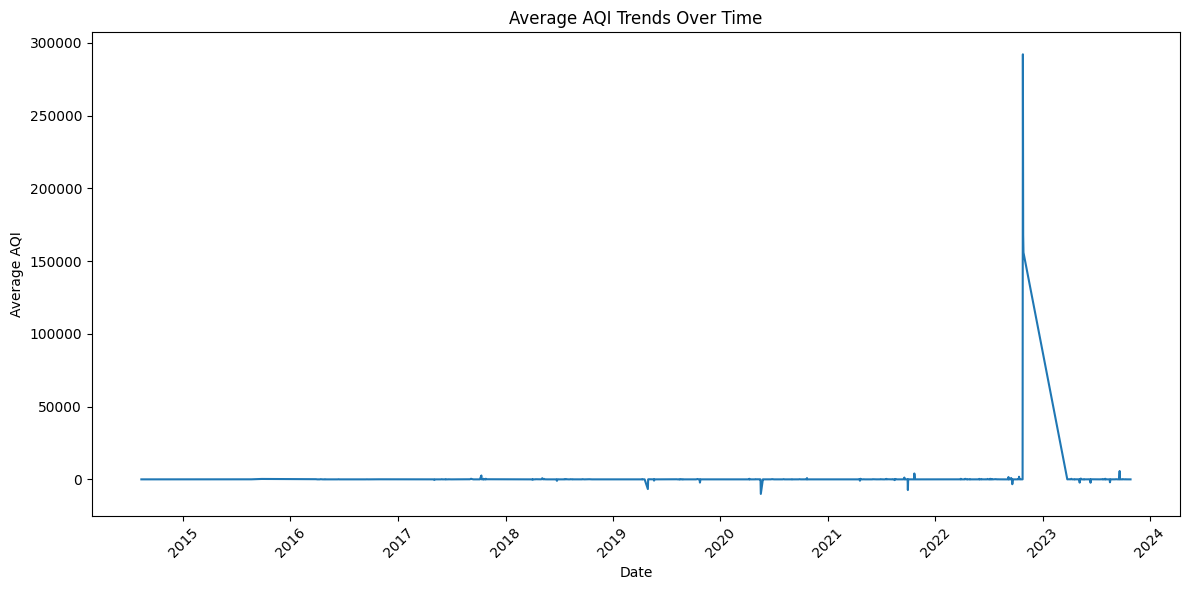

In [ ]:
# Line Graph: PM2.5 AQI Trend Over Time
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date is in datetime format
# Check if the column name is 'Date UTC' instead of 'date.utc'
if 'Date UTC' in df.columns:
    df['Date UTC'] = pd.to_datetime(df['Date UTC'])

    # Group by date and calculate mean AQI
    # The column name is 'AQI', not 'value'
    df_grouped_by_date = df.groupby(df['Date UTC'].dt.date).agg({'AQI':'mean'}).rename(columns={'AQI':'average_value'})

else:
    # If not, print a warning or handle the error appropriately
    print("Warning: 'Date UTC' column not found in the DataFrame. Attempting to use 'Last Updated' column.")
    # Try using 'Last Updated' column if 'Date UTC' is not found
    if 'Last Updated' in df.columns:
        # Ensure 'Last Updated' column is in datetime format
        df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
        # errors='coerce' handles invalid parsing by setting them to NaT (Not a Time)

        # Filter out rows with NaT (invalid datetime) in 'Last Updated'
        df = df.dropna(subset=['Last Updated'])

        df_grouped_by_date = df.groupby(df['Last Updated'].dt.date).agg({'AQI':'mean'}).rename(columns={'AQI':'average_value'})
    else:
        print("Error: Neither 'Date UTC' nor 'Last Updated' column found. Unable to proceed.")
        # Handle the error or raise an exception if neither column is found

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped_by_date, x=df_grouped_by_date.index, y='average_value')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.title('Average AQI Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

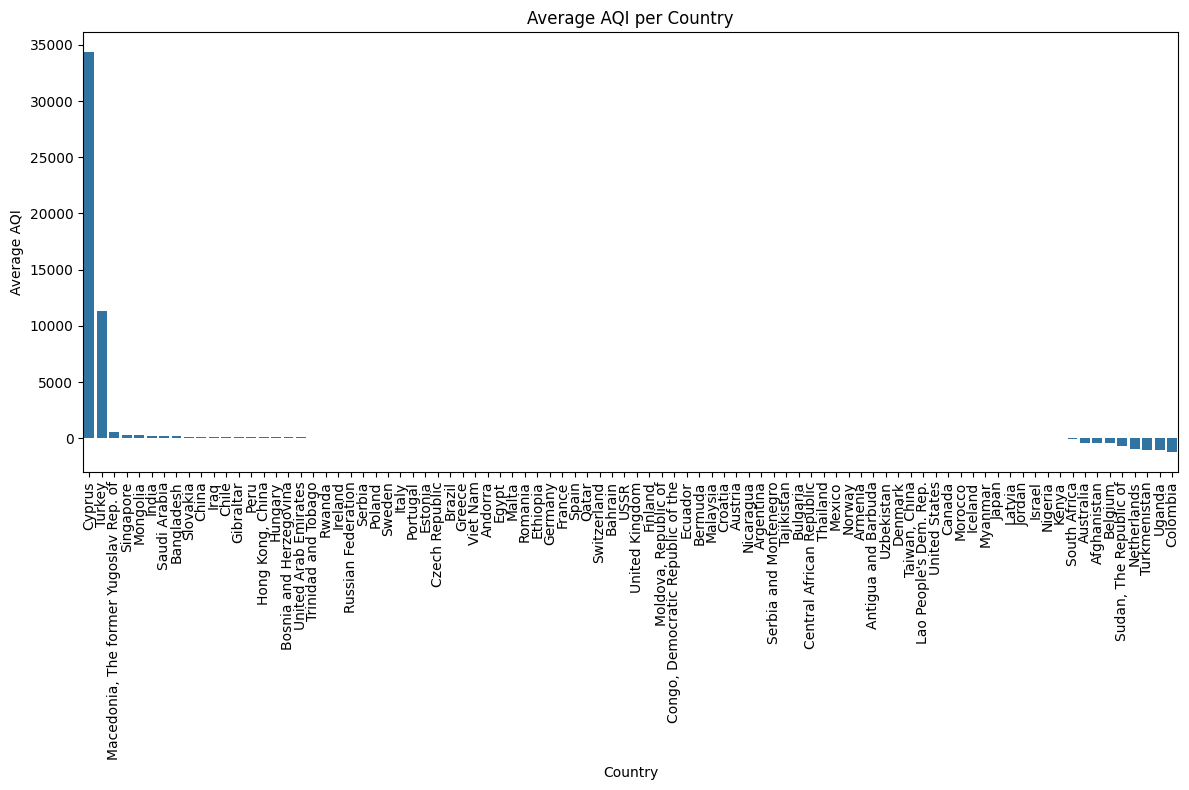

In [ ]:
# Bar Chart: Average AQI by Country
# Group by country and calculate average AQI
average_aqi_per_country = df.groupby('Country Label').agg({'AQI':'mean'}).rename(columns={'AQI':'average_value'}).sort_values(by='average_value', ascending=False)

# Create bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=average_aqi_per_country, x=average_aqi_per_country.index, y='average_value')
plt.xlabel('Country')
plt.ylabel('Average AQI')
plt.title('Average AQI per Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Geographic Map: Global AQI Distribution
import plotly.express as px

# Assuming 'Coordinates' is the correct column name (as seen in previous code)
# Separate latitude and longitude if coordinates are a single value
df[['latitude', 'longitude']] = df['Coordinates'].str.split(',', expand=True).astype(float)

# Create Scatter plot using plotly express
fig = px.scatter_geo(df,
                    lat="latitude",
                    lon="longitude",
                    color="AQI",
                    title="Air Quality distribution",
                    scope = 'world',
                    height = 600)
fig.show()

## INSIGHTS AND REPORTING

**Data Reliability Concerns:** The most significant finding is the apparent inconsistencies and potential reliability issues with the data. The extremely high average AQI values for Cyprus and Turkey, the sharp spike in AQI in late 2022 - early 2023, the many zero or near zero AQI values, as well as the extremely high AQI shown on the global map, indicate that there are data quality issues.

**Data Collection Bias:** The geographic map and the country-level bar chart indicate a significant data collection bias. We have more data points from regions with better monitoring infrastructure. The data may not provide a complete representation of global air quality.

**Temporal Analysis:** The spike around 2022-2023 requires further investigation. It's essential to understand if this is a data error or a legitimate event. We should investigate the specific pollutant and location values around this period.

**Country Analysis:** The extreme values in Cyprus and Turkey require investigation. We need to investigate the specific pollutants and values from these countries.

**Key Findings:** The dataset has potential data quality issues, especially around the 2022 - 2023 spike, Cyprus and Turkey, and the global distribution map.The data collection is biased towards specific regions.The average AQI values are not consistent across all countries or time period.